In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature



In [2]:
import dvfdata
df=dvfdata.loadDVF_Maisons(departement='All',refresh_force=False,add_commune=False)
df.shape

Read Mutations
Read Local
Read Parcelle
Read Adresse
Make the join for DVF
Filter data:
Final Calculations


(1890487, 11)

In [3]:
df.shape

(1890487, 11)

In [4]:
#1.890.487

In [5]:
#" and l.nbpprinc<=8 and l.sbati<=300 and m.sterr < 10000"
#" and m.valeurfonc < 2000000"


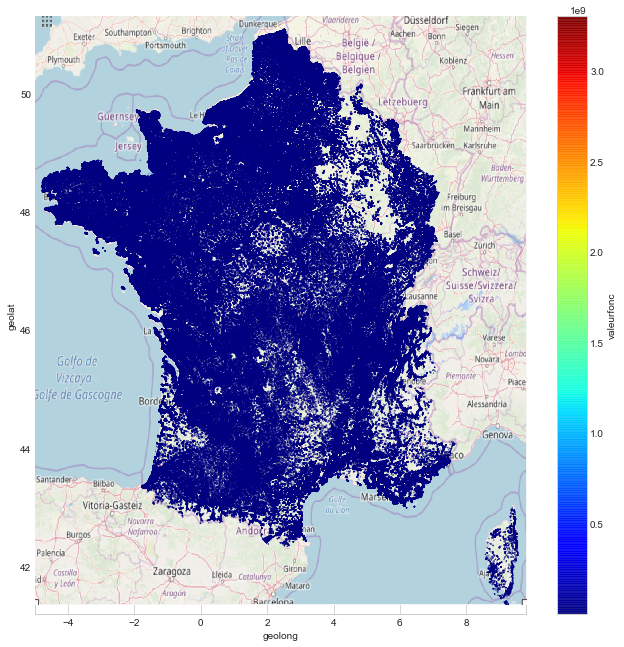

In [18]:
min_long=-5
max_long=9.8
min_lat=41.2
max_lat=51.3
graphsize=11
delta_lat=+0.15
img = plt.imread("maps_fonds/map_metropole.png")
extent = (min_long, max_long, min_lat+delta_lat, max_lat+delta_lat) # Use the boundaries for map background

fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=df.plot.scatter(x="geolong",y="geolat",alpha=0.9,c="valeurfonc"
        ,s=0.1,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()

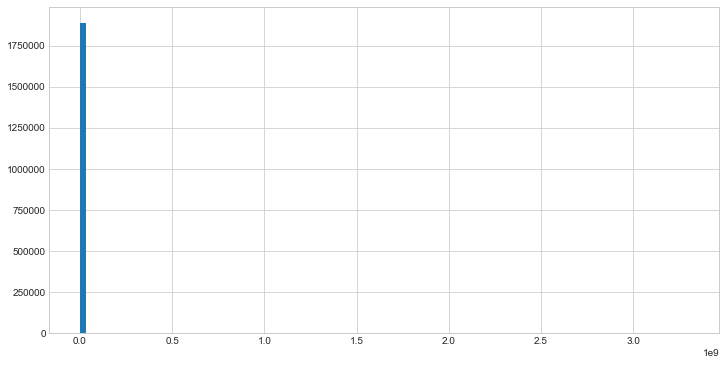

In [10]:
df["valeurfonc"].hist(bins=100,figsize=(12,6));

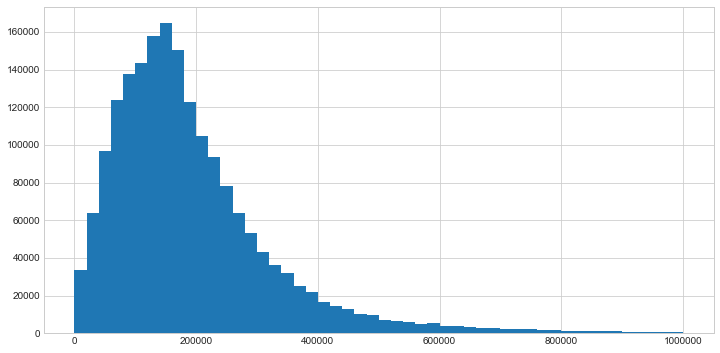

In [11]:
df[df["valeurfonc"] < 1000000]["valeurfonc"].hist(bins=50,figsize=(12,6));

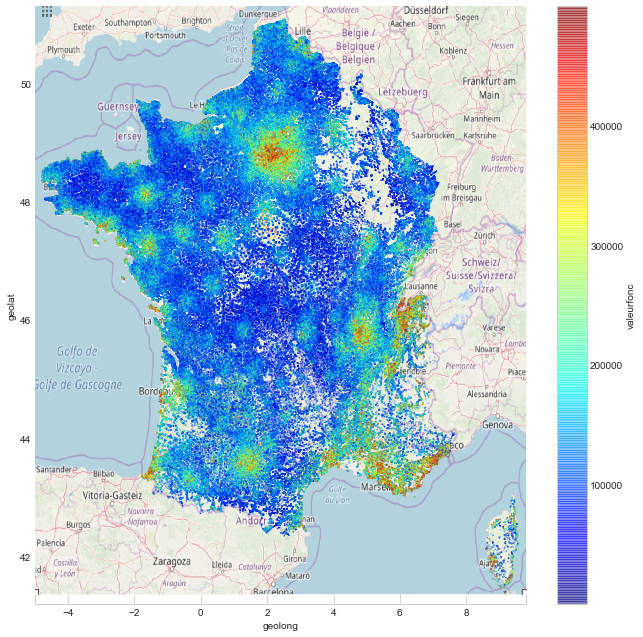

In [21]:
fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=df[df["valeurfonc"] < 500000].plot.scatter(x="geolong",y="geolat",alpha=0.5,c="valeurfonc"
        ,s=0.1,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()

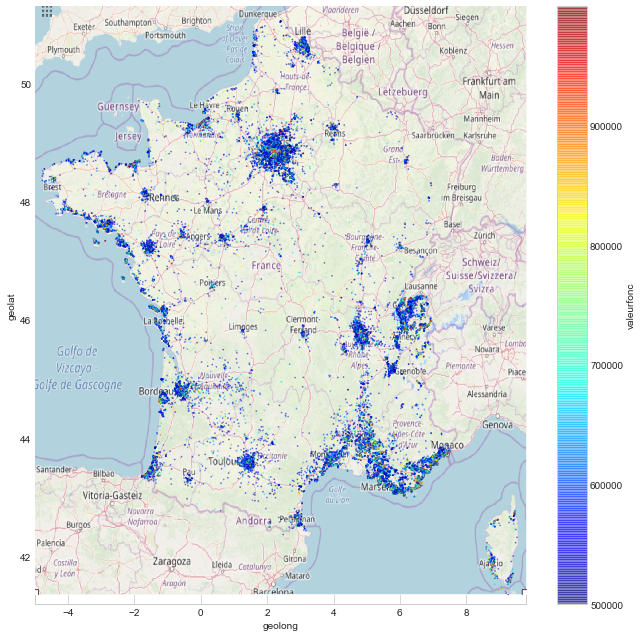

In [20]:
fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=df[(df["valeurfonc"] >=500000) & (df["valeurfonc"] < 1000000)].plot.scatter(x="geolong",y="geolat",alpha=0.5,c="valeurfonc"
        ,s=0.5,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()

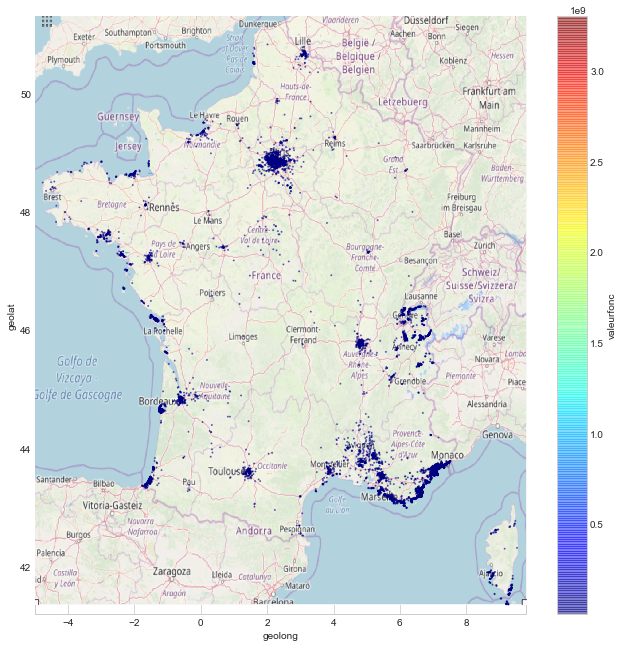

In [19]:
fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=df[(df["valeurfonc"] >=1000000)].plot.scatter(x="geolong",y="geolat",alpha=0.5,c="valeurfonc"
        ,s=1,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()

In [65]:
df[(df["valeurfonc"] >=1000000)].describe

<bound method NDFrame.describe of          idmutation                        idmutinvar    datemut  valeurfonc  \
index                                                                          
51           718868  02bc55e996d3ed74beea22f0e89786ca 2018-08-27   1061113.0   
88           718964  05a40dc6bf9e2ae1b8a5e1306d98f9cf 2018-10-05   2200000.0   
179          719265  0f846a7e2b285a9c673901082ab3a35f 2018-09-14  11905720.0   
277          719563  1940f87e4f10eb8e27f76ed20161d49f 2018-05-29   1740000.0   
284          719568  195f23f7151ab2d7a1958ce0973b7edd 2018-06-07   1163940.0   
...             ...                               ...        ...         ...   
1889548     5671881  74ab2f2314bfb27ecadec95c345ca4c7 2014-12-31   1104400.0   
1889784     5672689  9a14937e99a388aabedd9541cd0ed479 2014-12-23   3629563.0   
1889827     5672807  9fbbee4ea619e568170f5c184233c991 2014-11-28   1600000.0   
1890093     5673715  c799950661949bd6b9a1a291d0249ebf 2014-12-31   1150000.0   
189043